## Checking if attacks happen more in summer than other seasons

In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv("data/attacks.csv", encoding='cp1252')

In [3]:
df.shape

(25723, 24)

In [4]:
df.info() #check out the info of the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

### dropping all duplicated and empty rows
- create a fucntion called general cleaning

In [5]:
df.drop_duplicates(inplace= True) #remove all the values duplicated

In [6]:
df.shape

(6312, 24)

In [7]:
df.dropna(how= 'all',inplace= True) #removed all the rows which all the values were NaN.

In [8]:
df.shape

(6311, 24)

In [9]:
df.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1630,2004.10.21,21-Oct-2004,2004.0,Unprovoked,AUSTRALIA,New South Wales,Stockton Beach,Surfing,John Gresham,M,...,"Bronze whaler shark, 2.4 m [8']","The Border Mail, 10/23/2004",2004.10.21-Gresham.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.10.21,2004.10.21,4673.0,NaN,NaN


### Eliminating all the columns are not useful for the hypothesis and rows without the all data it's necesary 
- cleaning data not useful

In [10]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [11]:
df.drop (labels= ['Case Number', 'Type', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'Unnamed: 22', 'Unnamed: 23', 'original order', 'Area', 'Location'], axis= 1, inplace= True)

In [12]:
df.head()

,Date,Year,Country
0,25-Jun-2018,2018.0,USA
1,18-Jun-2018,2018.0,USA
2,09-Jun-2018,2018.0,USA
3,08-Jun-2018,2018.0,AUSTRALIA
4,04-Jun-2018,2018.0,MEXICO


### Deleting all the incidents happened before 1946 when the World Tourism Organization was created

In [13]:
df=df[df["Year"]>=1946] #remove the row before the year 

In [14]:
df['Year'] = df['Year'].astype('str') # remove the .0 format to have a proper year
df['Year'] = df['Year'].map(lambda x: x.rstrip('.0'))
df['Year'] = df['Year'].astype('int')

In [15]:
df.dropna(subset = ['Country'], inplace=True) # remove all the empty values for country

In [16]:
df['Country'] = df['Country'].apply(lambda x: x.lower())#lowercase to compare later with a list of countries

In [17]:
df['Country'] =df['Country'].str.strip()

In [18]:
df['Country'] = df['Country'].replace(["usa"], 'united states')
df['Country'] = df['Country'].replace(["sudan?"], 'sudan')
df['Country'] = df['Country'].replace(["united arab emirates (uae)"], 'united arab emirates')


### Creating a list of countries of the world separing them in between the north and south

- can be created as a function

In [19]:
l_country= pd.read_csv('data/list_country.csv') #we can see there's a latitude empty, so we remove it
l_country.dropna(how= 'any',inplace= True)

In [20]:
l_country["hemisphere"]=l_country["latitude"].apply(lambda x : "north" if x>0 else "south")
l_country['name'] = l_country['name'].apply(lambda x: x.lower())

In [21]:
l_country.drop (labels= ['latitude','longitude'], axis= 1, inplace= True)

In [22]:
l_country= l_country[l_country.hemisphere == "south"]
south_list= l_country['name'].values.tolist()

In [23]:
l_country.reset_index(drop=True)

,name,hemisphere
0,angola,south
1,antarctica,south
2,argentina,south
3,american samoa,south
4,australia,south
...,...,...
58,samoa,south
59,mayotte,south
60,south africa,south
61,zambia,south


### Comparing the df's

- Checking both lists can find there are some discrepancies how the countries are described. so, we gonna implement some changes to adjust as much as many countries in order to match both lists

In [24]:
ls_country_df= df['Country'].values.tolist()

In [25]:
df.set_index(['Country'], inplace=True) 

In [26]:
lst_n_s=[]
for i in ls_country_df:
    if i in south_list:
        lst_n_s.append("south")
    else:
        lst_n_s.append("north")

In [27]:
dict_={"hemisphere":lst_n_s, "Country": ls_country_df}

In [28]:
df_hemisphere=pd.DataFrame(dict_)

In [29]:
df_hemisphere.set_index(['Country'], inplace=True) 

In [30]:
df_concat = pd.concat([df, df_hemisphere], axis=1)

### Creating the seasons according to the hemisphere

In [31]:
import re
df_concat['month'] = df_concat['Date'].apply(lambda x: re.search(r'-(\w+)-', x).group(1) if re.search(r'-(\w+)-', x) else "month_not_found")

In [32]:
df_concat.month.replace({'Ap':'Apr','July': 'Jul'}, inplace =True )

In [33]:
df_concat.month.unique()

array(['Jun', 'May', 'month_not_found', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec',
       'Nov', 'Oct', 'Sep', 'Aug', 'Jul', '30'], dtype=object)

In [34]:
df_concat= df_concat[df_concat.month !='month_not_found'] 

In [35]:
df_concat= df_concat[df_concat.month !='30']

In [36]:
df_north= df_concat.loc[df_concat['hemisphere'] == "north"]#subset for northern countries

In [37]:
df_south= df_concat.loc[df_concat['hemisphere'] == "south"]#subset for southern countries

In [38]:
def south_season(month):
    season_month_south = {
            'Dec':'Summer', 'Jan':'Summer', 'Feb':'Summer',
            'Mar':'Autumn', 'Apr':'Autumn', 'May':'Autumn',
            'Jun':'Winter', 'Jul':'Winter', 'Aug':'Winter',
            'Sep':'Spring', 'Oct':'Spring', 'Nov':'Spring'}
    for key, value in season_month_south.items():
        if month in key:
            return value

In [39]:
df_south['season'] = df_south['month'].map(lambda month:south_season(month))

/var/folders/8p/zy_zh8_j0k926kzhhbp39j9c0000gn/T/ipykernel_18752/210517750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_south['season'] = df_south['month'].map(lambda month:south_season(month))


In [40]:
def north_season(month):
    season_month_north = {
            'Dec':'Winter', 'Jan':'Winter', 'Feb':'Winter',
            'Mar':'Spring', 'Apr':'Spring', 'May':'Spring',
            'Jun':'Summer', 'Jul':'Summer', 'Aug':'Summer',
            'Sep':'Autumn', 'Oct':'Autumn', 'Nov':'Autumn'}
    for key, value in season_month_north.items():
        if key in month:
            return value

In [41]:
df_north['season'] = df_north['month'].map(lambda month:north_season(month))

/var/folders/8p/zy_zh8_j0k926kzhhbp39j9c0000gn/T/ipykernel_18752/3300816878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north['season'] = df_north['month'].map(lambda month:north_season(month))


### Extracting the data

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


In [59]:
north_summer= df_north['season'].value_counts()['Summer']
north_autm  = df_north['season'].value_counts()['Autumn']
north_wnt   = df_north['season'].value_counts()['Winter']
north_sprng = df_north['season'].value_counts()['Spring']
total_north= df_north['season'].count()

In [60]:
print(north_summer, north_autm, north_wnt, north_sprng, total_north)

1020 675 259 486 2440


In [61]:
south_summer= df_south['season'].value_counts()['Summer']
south_autm  = df_south['season'].value_counts()['Autumn']
south_wnt   = df_south['season'].value_counts()['Winter']
south_sprng = df_south['season'].value_counts()['Spring']
total_south = df_south['season'].count()

In [62]:
print (south_summer, south_autm, south_wnt, south_sprng, total_south)

682 414 265 348 1709


In [63]:
df_north.groupby("season").agg("count")

,Date,Year,hemisphere,month
season,,,,
Autumn,675,675,675,675
Spring,486,486,486,486
Summer,1020,1020,1020,1020
Winter,259,259,259,259


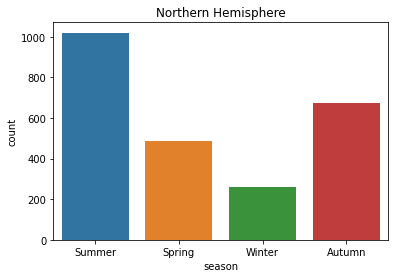

In [71]:
sns.countplot(x=df_north.season).set(title='Northern Hemisphere');

In [69]:
df_south.groupby("season").agg("count")

,Date,Year,hemisphere,month
season,,,,
Autumn,414,414,414,414
Spring,348,348,348,348
Summer,682,682,682,682
Winter,265,265,265,265


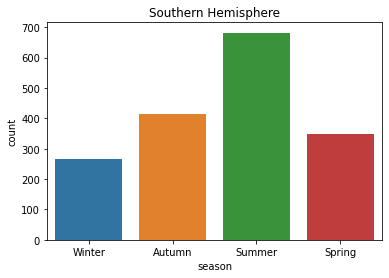

In [70]:
sns.countplot(x=df_south.season).set(title='Southern Hemisphere');

In [77]:
#df_north + df_south
df_both_hemisp_= pd.concat([df_north, df_south], ignore_index=True, sort=False)

In [78]:
df_both_hemisp_.groupby("season").agg("count")

,Date,Year,hemisphere,month
season,,,,
Autumn,1089,1089,1089,1089
Spring,834,834,834,834
Summer,1702,1702,1702,1702
Winter,524,524,524,524


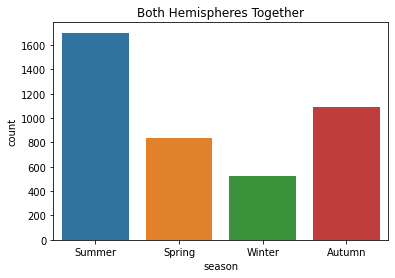

In [79]:
sns.countplot(x=df_both_hemisp_.season).set(title='Both Hemispheres Together');